In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
df = pd.read_csv('../data/denver_augmented_clean.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [ ]:
df

,property_id,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,...,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool
0,138574001,80002,8059.0,3047.0,SINGLE,True,False,True,False,True,...,2385.0,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
1,138573806,80002,8059.0,4382.0,SINGLE,True,False,False,False,True,...,2385.0,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
2,138572945,80002,8059.0,2654.0,SINGLE,False,False,False,False,True,...,2385.0,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
3,138568013,80002,8059.0,2265.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
4,138567989,80002,8059.0,1597.0,SINGLE,False,False,False,False,True,...,2385.0,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86782,346667918,80643,8123.0,640.0,SINGLE,False,False,False,False,True,...,1538.0,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537
86783,351843752,80643,8123.0,2280.0,SINGLE,True,False,False,False,False,...,1538.0,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537
86784,494325333,80643,8123.0,1728.0,SINGLE,True,False,False,False,True,...,1538.0,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537
86785,644993532,80643,8123.0,2527.0,SINGLE,True,False,False,False,True,...,1538.0,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537


In [ ]:
agg = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.week]).agg(count='count')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9374c2d9a0>,
      dtype=object)

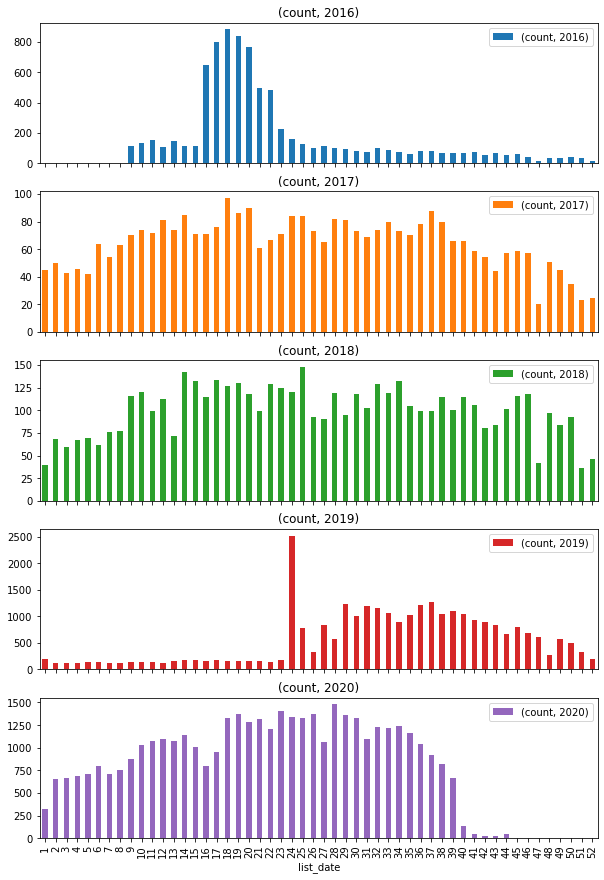

In [ ]:
agg.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [ ]:
quarter = (df['list_date'] >= pd.to_datetime('2019-4-1')) & (df['list_date'] < pd.to_datetime('2019-7-1'))

In [ ]:
small_df = df[quarter].copy()
small_df['list_date'] = pd.to_datetime(small_df['list_date'])
small_df['sale_date'] = pd.to_datetime(small_df['sale_date'])

In [ ]:
june = (small_df['list_date'] >= pd.to_datetime('2019-6-1')) & (small_df['list_date'] < pd.to_datetime('2019-7-1'))

In [ ]:
small_df['y'] = 0

In [ ]:
small_df.loc[june, 'y'] = 1

In [ ]:
df

,property_id,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,current_status,list_date,sale_date
0,138560546,80002,8059,39.79995,-105.08691,1687,SINGLE,False,False,False,False,False,Sale,2018-05-17,2018-07-09
1,138555680,80002,8059,39.79878,-105.10757,2220,SINGLE,False,False,False,False,False,Sale,2019-12-27,2020-01-31
2,138576011,80002,8059,39.79271,-105.14868,1200,SINGLE,False,False,False,False,False,Sale,2019-03-30,2019-05-17
3,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2017-09-28,2017-10-31
4,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2019-09-11,2019-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308878,577709232,80643,8001,39.95822,-104.54549,1996,SINGLE,False,False,False,False,False,Sale,2018-05-07,2018-07-20
308879,503644833,80643,8123,40.10629,-104.52506,1288,SINGLE,False,False,False,False,False,Sale,2018-07-31,2018-09-14
308880,551276799,80643,8123,40.03606,-104.47066,1810,SINGLE,False,False,False,False,False,Sale,2017-08-17,2017-10-11
308881,139419740,80643,8123,40.10923,-104.51945,1000,SINGLE,False,False,False,False,False,Sale,2018-05-11,2018-07-30


In [ ]:
print('Values equal 1: {}'.format(small_df['property_id'][small_df['y']== 1].count()))
print('Values equal 0: {}'.format(small_df['property_id'][small_df['y']== 0].count()))   

Values equal 1: 9993
Values equal 0: 14859


In [ ]:
dataset = small_df.drop(columns=['property_id', 'list_date', 'sale_date', 'current_status'])

In [ ]:
dataset

,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,y
61,80002,8059,39.797150,-105.085900,1394,CONDO,False,False,False,False,False,0
104,80002,8059,39.796200,-105.120540,2527,SINGLE,False,False,False,False,False,0
132,80002,8059,39.794810,-105.070930,1421,SINGLE,False,False,False,False,False,0
142,80002,8059,39.786990,-105.094710,2113,CONDO,False,False,False,False,False,0
155,80002,8059,39.790566,-105.086278,950,CONDO,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
308851,80643,8001,39.972070,-104.449850,1656,SINGLE,False,False,False,False,False,1
308859,80643,8123,40.103200,-104.520760,1665,SINGLE,False,False,False,False,False,1
308865,80643,8123,40.075910,-104.516870,2860,SINGLE,False,False,False,False,False,0
308869,80643,8123,40.002270,-104.540760,2710,SINGLE,False,False,False,False,True,0


In [ ]:
dataset['property_type'].unique()

array(['CONDO', 'SINGLE', 'MULTI_FAMILY', 'LAND', 'OTHER', 'TOWNHOUSE'],
      dtype=object)

In [ ]:
mapping = {k: v for v, k in enumerate(dataset.property_type.unique())}
mapping

{'CONDO': 0,
 'SINGLE': 1,
 'MULTI_FAMILY': 2,
 'LAND': 3,
 'OTHER': 4,
 'TOWNHOUSE': 5}

In [ ]:
dataset['property_type_code'] = dataset['property_type'].map(mapping)

In [ ]:
dataset

,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,y,property_type_code
61,80002,8059,39.797150,-105.085900,1394,CONDO,False,False,False,False,False,0,0
104,80002,8059,39.796200,-105.120540,2527,SINGLE,False,False,False,False,False,0,1
132,80002,8059,39.794810,-105.070930,1421,SINGLE,False,False,False,False,False,0,1
142,80002,8059,39.786990,-105.094710,2113,CONDO,False,False,False,False,False,0,0
155,80002,8059,39.790566,-105.086278,950,CONDO,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308851,80643,8001,39.972070,-104.449850,1656,SINGLE,False,False,False,False,False,1,1
308859,80643,8123,40.103200,-104.520760,1665,SINGLE,False,False,False,False,False,1,1
308865,80643,8123,40.075910,-104.516870,2860,SINGLE,False,False,False,False,False,0,1
308869,80643,8123,40.002270,-104.540760,2710,SINGLE,False,False,False,False,True,0,1


In [ ]:
y = dataset['y'].copy()

In [ ]:
X = dataset.drop(columns=['y', 'property_type', 'latitude', 'longitude', 'zipcode'])

In [ ]:
X

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,property_type_code
61,8059,1394,False,False,False,False,False,0
104,8059,2527,False,False,False,False,False,1
132,8059,1421,False,False,False,False,False,1
142,8059,2113,False,False,False,False,False,0
155,8059,950,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...
308851,8001,1656,False,False,False,False,False,1
308859,8123,1665,False,False,False,False,False,1
308865,8123,2860,False,False,False,False,False,1
308869,8123,2710,False,False,False,False,True,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_test

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,property_type_code
260573,8013,1368,False,False,False,False,False,0
245320,8013,1117,False,False,False,False,False,1
198214,8059,1131,False,False,False,False,False,2
107867,8005,1320,False,False,False,False,False,0
167122,8031,1484,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...
270352,8069,1196,False,False,False,False,False,1
300423,8001,2886,False,False,False,False,False,1
222442,8031,1459,False,False,False,False,False,1
173743,8059,1800,False,False,False,False,False,1


In [ ]:
y_test

260573    0
245320    1
198214    1
107867    0
167122    1
         ..
270352    0
300423    0
222442    1
173743    1
129385    0
Name: y, Length: 8202, dtype: int64

In [ ]:
logit_reg = LogisticRegression().fit(X_train, y_train)

In [ ]:
print('Train set accuracy: {}'.format(logit_reg.score(X_train, y_train)))
print('Test set accuracy: {}'.format(logit_reg.score(X_test, y_test)))

Train set accuracy: 0.6722522522522523
Test set accuracy: 0.6737381126554499


In [ ]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

In [ ]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=250, random_state=0)

In [ ]:
print('Train set accuracy: {}'.format(forest.score(X_train, y_train)))
print('Test set accuracy: {}'.format(forest.score(X_test, y_test)))

Train set accuracy: 0.9076876876876877
Test set accuracy: 0.616556937332358


## Listing duration

In [ ]:
df['listing_duration'] = df['sale_date'] - df['list_date']

In [ ]:
df

,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,list_date,...,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,listing_duration
0,80002,8059.0,3047.0,SINGLE,True,False,True,False,True,2020-09-24,...,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,39 days
1,80002,8059.0,4382.0,SINGLE,True,False,False,False,True,2020-09-24,...,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,35 days
2,80002,8059.0,2654.0,SINGLE,False,False,False,False,True,2020-09-24,...,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,25 days
3,80002,8059.0,2265.0,SINGLE,False,False,False,False,False,2020-09-24,...,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,34 days
4,80002,8059.0,1597.0,SINGLE,False,False,False,False,True,2020-09-15,...,3317.321845,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,43 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86782,80643,8123.0,640.0,SINGLE,False,False,False,False,True,2018-12-28,...,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,119 days
86783,80643,8123.0,2280.0,SINGLE,True,False,False,False,False,2020-03-05,...,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,134 days
86784,80643,8123.0,1728.0,SINGLE,True,False,False,False,True,2019-12-22,...,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,103 days
86785,80643,8123.0,2527.0,SINGLE,True,False,False,False,True,2018-01-12,...,10.744623,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,654 days


In [ ]:
X = df.drop(columns=['zipcode', 'list_date', 'sale_date'])
X['property_type_code'] = X['property_type'].map(mapping)
X = X.drop(columns=['property_type'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86787 entries, 0 to 86786
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   fips                             86787 non-null  float64        
 1   sqft                             86787 non-null  float64        
 2   has_central_air                  86787 non-null  bool           
 3   has_jacuzzi                      86787 non-null  bool           
 4   has_pool                         86787 non-null  bool           
 5   has_solar                        86787 non-null  bool           
 6   has_garage                       86787 non-null  bool           
 7   bedrooms                         86787 non-null  float64        
 8   full_baths                       86787 non-null  float64        
 9   sale_price_per_sqft              86787 non-null  float64        
 10  farm_score                       86787 non-nul

In [ ]:
y = X['listing_duration'].dt.days.astype('int16')
X = X.drop(columns=['listing_duration'])

In [ ]:
X.head()

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,bedrooms,full_baths,sale_price_per_sqft,...,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,property_type_code
0,8059.0,3047.0,True,False,True,False,True,5.0,3.0,206.760748,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,1
1,8059.0,4382.0,True,False,False,False,True,4.0,2.0,183.706070,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,1
2,8059.0,2654.0,False,False,False,False,True,4.0,2.0,250.565185,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,1
3,8059.0,2265.0,False,False,False,False,False,4.0,2.0,267.991170,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,1
4,8059.0,1597.0,False,False,False,False,True,5.0,1.0,283.030683,...,3317.321845,100.0,66.918255,43.566921,67.42143,2.764467,0.015244,0.016463,0.080793,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
print('Train set R2: {}'.format(linear_reg.score(X_train, y_train)))
print('Test set R2: {}'.format(linear_reg.score(X_test, y_test)))

Train set R2: 0.05447514183868485
Test set R2: 0.04950724658248917


In [ ]:
df['listing_duration']

0        39 days
1        35 days
2        25 days
3        34 days
4        43 days
          ...   
86782   119 days
86783   134 days
86784   103 days
86785   654 days
86786   327 days
Name: listing_duration, Length: 86787, dtype: timedelta64[ns]

In [ ]:
df['duration'] = df['listing_duration'].dt.days.astype('int16')

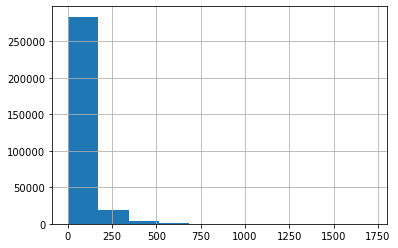

In [ ]:
durations.hist()

In [ ]:
durations.max()

1716

In [ ]:
durations.min()

0

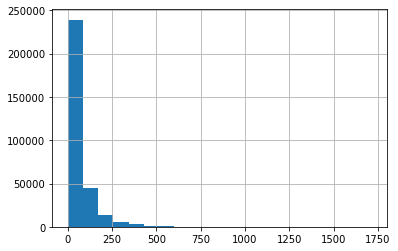

In [ ]:
durations.hist(bins=20)

In [ ]:
small_dr = durations[durations < 500]

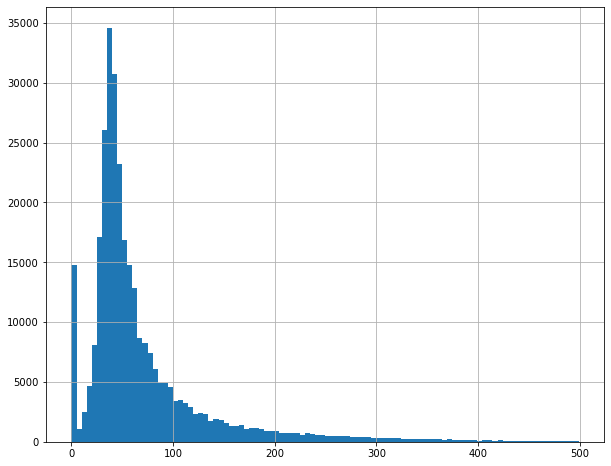

In [ ]:
small_dr.hist(bins=100, figsize=(10,8))

In [ ]:
df

,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,list_date,...,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool,listing_duration,duration
0,80002,8059.0,3047.0,SINGLE,True,False,True,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,39 days,39
1,80002,8059.0,4382.0,SINGLE,True,False,False,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,35 days,35
2,80002,8059.0,2654.0,SINGLE,False,False,False,False,True,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,25 days,25
3,80002,8059.0,2265.0,SINGLE,False,False,False,False,False,2020-09-24,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,34 days,34
4,80002,8059.0,1597.0,SINGLE,False,False,False,False,True,2020-09-15,...,100.0,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793,43 days,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86782,80643,8123.0,640.0,SINGLE,False,False,False,False,True,2018-12-28,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,119 days,119
86783,80643,8123.0,2280.0,SINGLE,True,False,False,False,False,2020-03-05,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,134 days,134
86784,80643,8123.0,1728.0,SINGLE,True,False,False,False,True,2019-12-22,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,103 days,103
86785,80643,8123.0,2527.0,SINGLE,True,False,False,False,True,2018-01-12,...,100.0,54.298991,67.285370,75.688086,1.632209,0.016275,0.001878,0.063537,654 days,654


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>